In [16]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

In [18]:
# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
#消去した割合
dropout_ratio = 0.2
# ====================================================

In [19]:
#学習と推論
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.34199043341104
=== epoch:1, train acc:0.13666666666666666, test acc:0.1046 ===
train loss:2.3280018871313577
train loss:2.3186849804835266
train loss:2.3185685014577326
=== epoch:2, train acc:0.14, test acc:0.1058 ===
train loss:2.330131290381574
train loss:2.3006592412142397
train loss:2.333240440957601
=== epoch:3, train acc:0.14, test acc:0.1089 ===
train loss:2.3281563282744275
train loss:2.323494610500098
train loss:2.3061223336427537
=== epoch:4, train acc:0.14333333333333334, test acc:0.1098 ===
train loss:2.315379677768546
train loss:2.3269325950022353
train loss:2.3121898402752254
=== epoch:5, train acc:0.14333333333333334, test acc:0.1106 ===
train loss:2.3134335616485013
train loss:2.302311788670613
train loss:2.305611650324421
=== epoch:6, train acc:0.15, test acc:0.1109 ===
train loss:2.3211046576603795
train loss:2.310791715610426
train loss:2.3194375579694784
=== epoch:7, train acc:0.15, test acc:0.113 ===
train loss:2.303439277615259
train loss:2.3019121372

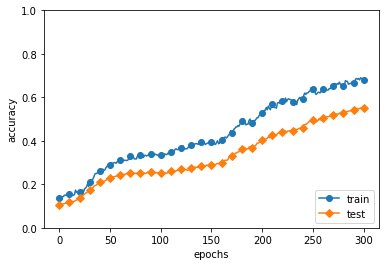

In [20]:
# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
#10刻みにポイント
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='D', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()